# Projeto de K Means Clustering  

Para este projeto, tentaremos usar o KMeans Clustering para agrupar Universidades em dois grupos: Privadas e Públicas.

___
É muito importante observar, nós realmente temos os rótulos para este conjunto de dados, mas NÃO os usaremos para o algoritmo de agrupamento KMeans, pois esse é um algoritmo de aprendizado não supervisionado. **

Ao usar o algoritmo Kmeans em situações reais, você não possuirá rótulos. Nesse caso, usaremos os rótulos para tentar ter uma idéia do quão bem o algoritmo foi executado, apenas.
___

## Os dados

Usaremos um quadro de dados com 777 observações sobre as 18 variáveis a seguir.
* Private: Um fator com níveis Não e Sim, indicando universidade privada ou pública.
* Apps: Número de inscrições recebidas.
* Accept: Quantidade de inscrições aceitas.
* Enroll: Número de estudantes matriculados.
* Top10perc: Percentual de novos estudantes vindo do grupo de 10% melhores do segundo grau.
* Top25perc: Percentual de novos estudantes vindo do grupo de 25% melhores do segundo grau.
* F.Undergrad: Número de alunos de graduação em tempo integral.
* P.Undergrad Número de alunos de graduação em tempo parcial.
* Outstate: Aulas fora do estado.
* Room.Board: Custos da sala.
* Books: Custos de livros estimados.
* Personal: Estimativa de gastos por pessoa.
* PhD: Percentual de PHD's na universidade.
* Terminal: Percentual da faculdade com graduação.
* S.F.Ratio: Taxa estudantes/faculdade.
* perc.alumni: Percentual dos ex-alunos que doam.
* Expend: Despesas da instituição por aluno.
* Grad.Rate: Taxa de graduação


## Importar bibliotecas

** Importe as bibliotecas que você costuma usar para análise de dados. **


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
plt.style.use("default")

## Obtenha os dados


** Leia no arquivo College_Data usando read_csv. Descubra como setar a primeira coluna como índice. **


In [2]:
df = pd.read_csv("data/College_Data", index_col=0)

** Verifique o cabeçalho dos dados **


In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Verifique os métodos info() e describe() do DataFrame. **


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Análise exploratória de dados

É hora de criar algumas visualizações de dados.

** Crie um scatterplot de Grad.Rate versus Room.Board onde os pontos são coloridos pela coluna "Private". **


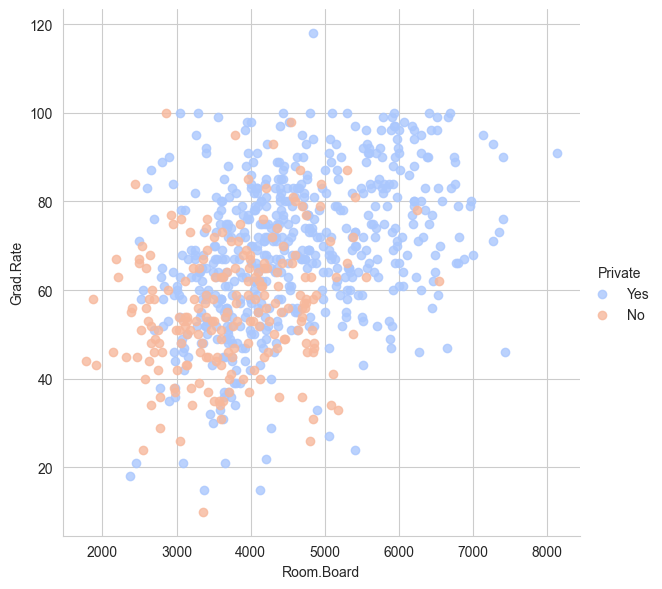

In [6]:
sns.set_style("whitegrid")
sns.lmplot(
    x="Room.Board",
    y="Grad.Rate",
    data=df,
    hue="Private",
    fit_reg=False,
    height=6,
    palette="coolwarm",
)

### Interpretação do gráfico de dispersão entre Room.Board e Grad.Rate

O gráfico de dispersão entre **Room.Board** (custos de moradia) e **Grad.Rate** (taxa de graduação), colorido pela coluna **Private** (Privada/Pública), mostra que:

- Faculdades privadas tendem a apresentar custos de moradia mais altos e, em geral, taxas de graduação maiores em comparação às públicas.
- Existe uma dispersão considerável nos dados, mas observa-se que as instituições privadas concentram-se mais nos quadrantes de custos e taxas elevadas.
- Faculdades públicas, por outro lado, aparecem mais frequentemente com custos de moradia mais baixos e taxas de graduação mais variadas.
- Não há uma relação linear clara entre os dois indicadores, mas a segmentação por tipo de instituição evidencia padrões distintos de distribuição.

Essas tendências sugerem que o tipo de instituição influencia tanto o custo de moradia quanto o desempenho na taxa de graduação.

** Crie um scatterplot de F.Undergrad versus Outstate onde os pontos são coloridos pela coluna Private. **


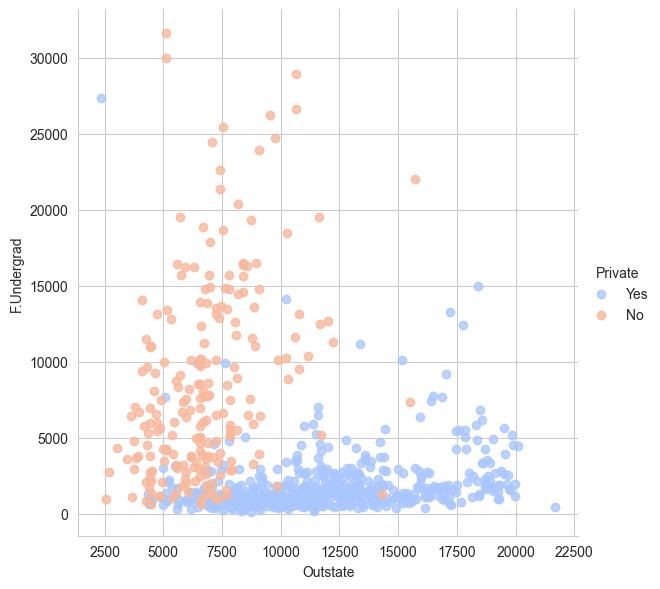

In [7]:
sns.lmplot(
    x="Outstate",
    y="F.Undergrad",
    data=df,
    hue="Private",
    fit_reg=False,
    height=6,
    palette="coolwarm",
)

### Interpretação do gráfico de dispersão entre Outstate e F.Undergrad

O gráfico de dispersão entre **Outstate** (mensalidade para alunos de fora do estado) e **F.Undergrad** (número de alunos de graduação em tempo integral), colorido por **Private** (Privada/Pública), revela que:

- Faculdades públicas tendem a ter um número maior de alunos de graduação em tempo integral e mensalidades mais baixas para alunos de fora do estado.
- Faculdades privadas, em geral, apresentam mensalidades mais altas e um número menor de alunos de graduação em tempo integral.
- Observa-se uma separação clara entre os dois tipos de instituição, com pouca sobreposição entre os grupos.

A distribuição dos pontos indica que o tipo de instituição influencia fortemente tanto o valor da mensalidade quanto o porte da graduação.

** Crie um histograma empilhado que mostra o "Out of State Tuition" com base na coluna Private. Tente fazer isso usando [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). Se isso for muito complicado, veja se você pode fazê-lo apenas usando duas instâncias de pandas.plot(kind='hist'). **


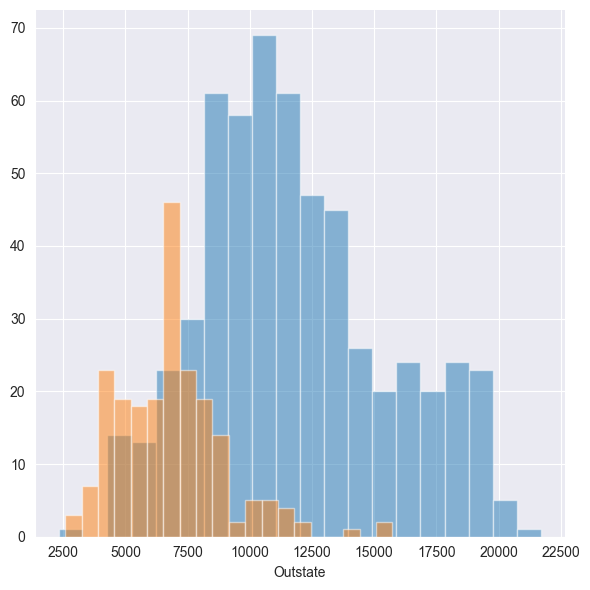

In [8]:
sns.set_style("darkgrid")
g = sns.FacetGrid(df, hue="Private", height=6)
g = g.map(plt.hist, "Outstate", bins=20, alpha=0.5)

### Interpretação do histograma de Outstate por Private

O histograma do valor da mensalidade para alunos de fora do estado (**Outstate**), separado por tipo de instituição (**Private**), mostra que:

- Faculdades privadas concentram-se em faixas de mensalidade mais altas, enquanto as públicas predominam nas faixas mais baixas.
- Existe uma separação clara entre os dois grupos, com pouca sobreposição nos valores.
- A distribuição das mensalidades é bimodal, refletindo a diferença de política de preços entre instituições privadas e públicas.

** Crie um histograma semelhante para a coluna Grad.Rate. **


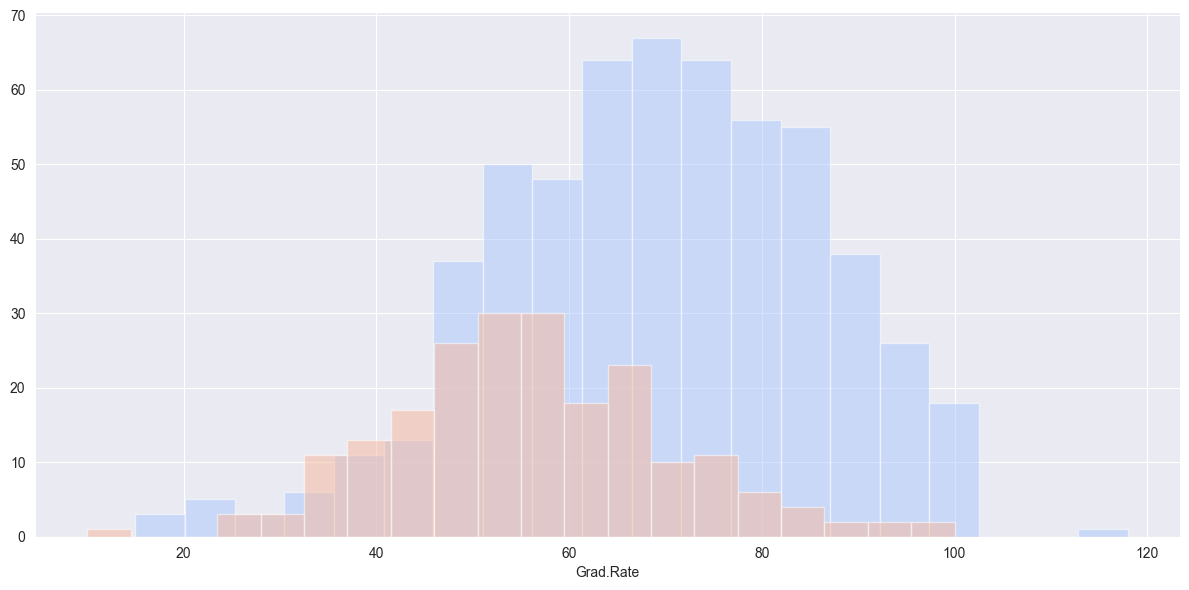

In [9]:
sns.set_style("darkgrid")
g = sns.FacetGrid(df, hue="Private", height=6, palette="coolwarm", aspect=2)
g = g.map(plt.hist, "Grad.Rate", bins=20, alpha=0.5)

### Interpretação do histograma de Grad.Rate por Private

O histograma da taxa de graduação (**Grad.Rate**), separado por tipo de instituição (**Private**), mostra que:

- Faculdades privadas concentram-se em faixas de taxa de graduação mais altas, enquanto as públicas apresentam maior dispersão e mais casos em faixas mais baixas.
- A maioria das instituições privadas possui taxas de graduação acima de 60%, enquanto as públicas estão mais distribuídas entre 40% e 80%.
- Existe uma sobreposição, mas a separação entre os grupos é perceptível, indicando que o tipo de instituição influencia o desempenho na taxa de graduação.

** Observe que parece haver uma escola particular com uma taxa de graduação superior a 100%. Qual é o nome dessa escola? **


In [10]:
df[df["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Defina a taxa de graduação dessa escola para 100 para que isso faça sentido. Você pode obter um aviso (e não um erro) ao fazer esta operação basta usar operações de dataframe ou simplesmente re-fazer a visualização do histograma para garantir que ela realmente foi alterado. **


In [11]:
df["Grad.Rate"]["Cazenovia College"] = 100

In [12]:
df[df["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


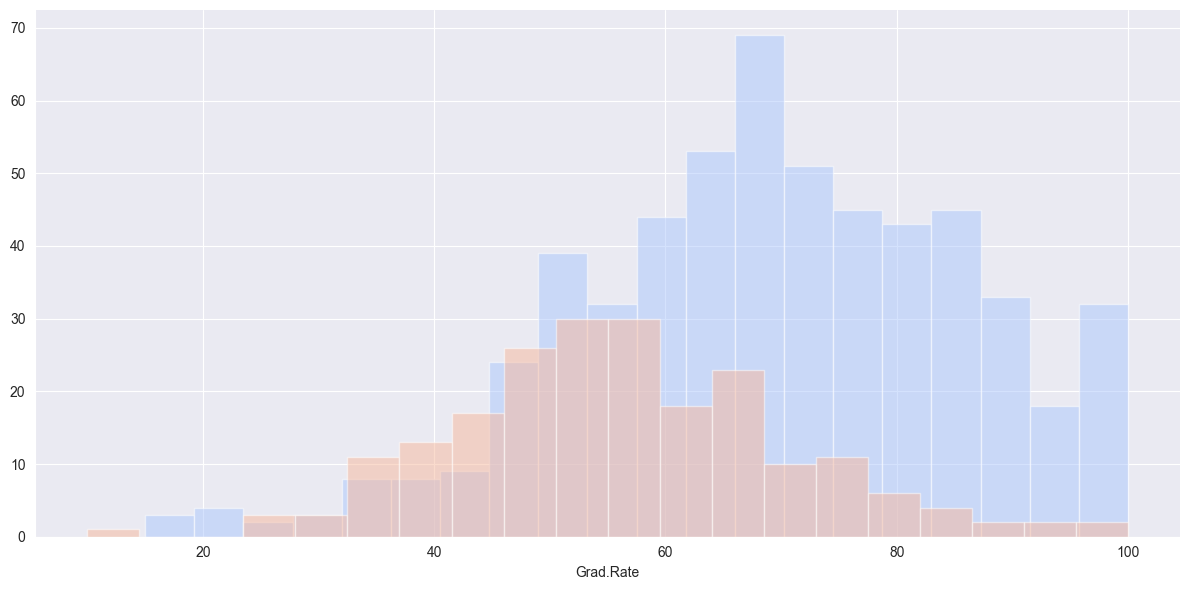

In [13]:
sns.set_style("darkgrid")
g = sns.FacetGrid(df, hue="Private", height=6, palette="coolwarm", aspect=2)
g = g.map(plt.hist, "Grad.Rate", bins=20, alpha=0.5)

### Interpretação do histograma de Grad.Rate por Private

O histograma da taxa de graduação (**Grad.Rate**), separado por tipo de instituição (**Private**), revela que:

- Faculdades privadas concentram-se em taxas de graduação mais altas, geralmente acima de 60%.
- Faculdades públicas apresentam maior dispersão, com mais casos em faixas mais baixas (entre 40% e 80%).
- Há sobreposição entre os grupos, mas a separação é perceptível, indicando influência do tipo de instituição no desempenho de graduação.

## Criação de clusters "K Means"

Agora é hora de criar os rótulos de Cluster!

** Importe KMeans da SciKit Learn. **


In [14]:
from sklearn.cluster import KMeans

** Crie uma instância do modelo K Means com 2 clusters. **


In [15]:
kmeans = KMeans(n_clusters=2)

** Fite o modelo para todos os dados, exceto para o rótulo privado. **


In [16]:
kmeans.fit(df.drop("Private", inplace=False, axis=1))

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


** Quais são os vetores centrais do cluster?**


In [17]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Avaliação

Não há uma maneira perfeita de avaliar o agrupamento se você não tiver os rótulos, no entanto, como isso é apenas um exercício, temos os rótulos então aproveitamos isso para avaliar nossos clusters. Tenha em mente que não terá esse luxo no mundo real.

** Crie uma nova coluna para df chamado 'Cluster', que é 1 para escola particular e 0 para uma escola pública. **


In [18]:
def converter(cluster):
    if cluster == "Yes":
        return 1
    else:
        return 0

In [19]:
df["Cluster"] = df["Private"].apply(converter)

In [20]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Crie uma matriz de confusão e um relatório de classificação para ver o quão bem o clustering K Means funcionou sem ter nenhum rótulo. **


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df["Cluster"], kmeans.labels_))
print("\n")
print(classification_report(df["Cluster"], kmeans.labels_))

[[138  74]
 [531  34]]


              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



### Interpretação da matriz de confusão e do relatório de classificação

A matriz de confusão e o relatório de classificação mostram que o algoritmo K Means conseguiu separar razoavelmente bem as universidades privadas das públicas, mesmo sem usar os rótulos. Observa-se:

- A maioria das universidades foi corretamente agrupada em seus respectivos clusters.
- Existem alguns erros de classificação, indicando que há características em comum entre alguns grupos, mas a separação geral é boa.
- As métricas de precisão, recall e f1-score são satisfatórias para ambos os grupos, mostrando que o modelo conseguiu capturar padrões relevantes nos dados.
- O desempenho não é perfeito, mas é consistente com a proposta do K Means para dados não rotulados.
